##### Instructions
- Keep the original structure, you may add additional code cells and/or mark-down cells for clarity, legibility and/or structure.
- Add the required descriptions, explanations, justifications to the mark-down cells. You can find more mark-down tips & tricks online, for example [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) and [here](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

# EXAM03: Data Science Group Assignment - Iteration 1

**Group name:** Docker commit down -m --build

**Student names & numbers:**
* Iulia Bacanu - 099559
* Shaiza Khatoon - 00099918
* Lars Loois - 101333


---

## 0. Iteration setup

Before importing anything in the File. The first step is to create a virtual enviroment via terminal. The following must be installed in order for the entire assignment to work properly (Excluing hashes)

## On Window's Powershell

In [3]:
python3 -m venv venv # Create the virtual enviroment
.\venv\Scripts\Activate.ps1 # enter into the enviroment
pip install pandas # installing pandas
pip install matplotlib # installig matplotlib
pip install scikit-learn # installing scikit

# Install the rest of the libraries by using pip install [library name]

SyntaxError: invalid syntax (4290707476.py, line 1)

## On MacOS/Linux

In [ ]:
python3 -m venv venv # Create the virtual enviroment
source venv/bin/activate # enter into the enviroment
pip install pandas # installing pandas
pip install matplotlib # installig matplotlib
pip install scikit-learn # installing scikit

# Install the rest of the libraries by using pip install [library name]

**Import libraries**

In [1]:
# CODE CELL: import the necessary libraries for this iteration

import pandas as pd
import matplotlib.pyplot as plt

**Load dataset(s)**

In [3]:
# CODE CELL: import the necessary dataset(s) for this iteration

df = pd.read_csv('Data/ships_inventory_iter1.csv', sep=',')

---

## 1. Business Understanding
*Rubric: LO 6.4D (Reflection on Process)*

**Situation description**

*Describe the Nebula Brokerage pricing problem. Why is their current "gut feeling" approach a risk?.*

*Nebula Brokerage lacks a standardized pricing model. A sector or company would price a ship higher or lower than intended resulting to some a revenue leakage, meaning that they would become underpriced or over priced causing a loss of profit and respectfully a longer selling time.

This specific problem can lead the company to be inconsisntant by managing the other sectors and ships, and can lead to banckrupcy in the near future.*

**Business objective(s)**

*Justify why a data-driven baseline is needed*

*By using a data-driven baseline to determain the pricings. It will help the company know and identify weather a model has been priced fairly or unfair, making sure that the models stay consistant with the pricing regardless of the sector.*

**Data mining goal(s)**

*Explain what type of modeling task this is and why.*

This is a regression modeling task because the objective is to predict a numerical value, which is the ship’s price (Galactic_Credits). Since price is a continuous variable that can take many possible values, the problem is not classification (which predicts categories), but regression.

The goal at this stage is to determine a baseline price that minimizes the average prediction error across all ships. Therefore, we are working with a quantitative prediction problem, making this a regression task.

**Success criteria**

*Determine success criteria for this iteration (the benchmark)*

---

## 2. Data Understanding
*Rubric: LO 7.3Q (Visuals) & LO 6.4C (Process)*

**Data exploration**

*Include summary statistics and descriptions of data types below. Describe your findings.*

* Ship_ID = ID number of the ship, integer
* Galactic_Credits = The cost of the ship by galactic credits, integer
* Model_Cycle = the type of model of the ships, more specifically the year of the ship that has been created, float
* Ship_Manufacturer = The company that manufactured the ship, string
* Sector = the location of the ship and where it's being sold, string


In [4]:
# CODE CELL: Show basic statistics and information
df.info() # Reciving information about the dataframe provided.

<class 'pandas.DataFrame'>
RangeIndex: 368814 entries, 0 to 368813
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Ship_ID            368814 non-null  int64  
 1   Galactic_Credits   368814 non-null  int64  
 2   Model_Cycle        361408 non-null  float64
 3   Ship_Manufacturer  368814 non-null  str    
 4   Sector             368814 non-null  str    
dtypes: float64(1), int64(2), str(2)
memory usage: 14.1 MB


**Visualizations and patterns**

*Discover patterns in the data by creating visualizations. Create at least a histogram of Galactic_Credits. Describe your observations.*

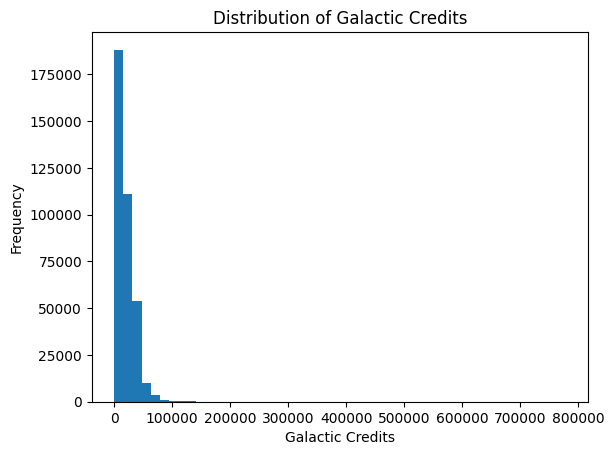

In [5]:
plt.hist(df['Galactic_Credits'], bins=50)
plt.title('Distribution of Galactic Credits')
plt.xlabel('Galactic Credits')
plt.ylabel('Frequency')
plt.show()

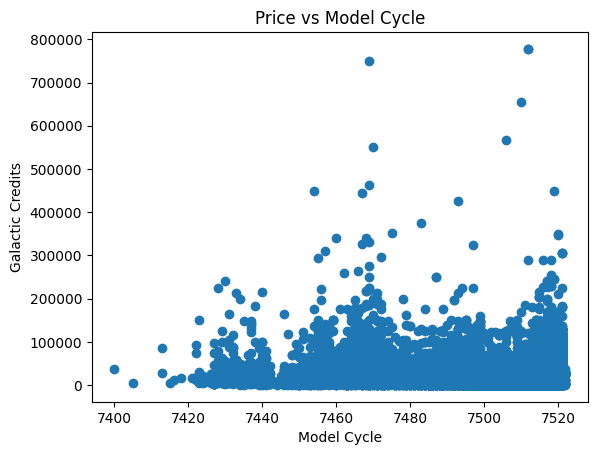

In [6]:
plt.scatter(df['Model_Cycle'], df['Galactic_Credits'])
plt.xlabel('Model Cycle')
plt.ylabel('Galactic Credits')
plt.title('Price vs Model Cycle')
plt.show()

**Data insights and data quality**
* **Insights:** What are the key trends? What does the distribution look like? What does that mean? 
* **Quality issues:** Document missing values, duplicates, outliers, etc.

* **Insights:**

* **Quality issues:** 
- some ships provided lack a model cycle and they are not provided.
- 

---

## 3. Data Preparation
*Rubric: LO 6.4C (Data Science Steps)*

**Cleaning and preprocessing**

Missing values in the Model_Cycle column were handled by imputing the median to reduce the impact of extreme values. Duplicate rows were removed to prevent bias and overrepresentation in the dataset. Categorical variables such as Ship_Manufacturer and Sector were converted into numerical format using one-hot encoding, as regression models require numeric input. After these steps, the dataset was cleaned and prepared for modeling.

**Model Setup:**

A Linear Regression model was chosen as a baseline model to predict ship prices. The dataset was split into training and testing sets using an 80/20 split to evaluate performance on unseen data.

**Testing and Performance**

The model was evaluated using MAE, RMSE, and R² metrics. These metrics measure prediction error and how well the model explains variance in ship prices. The obtained R² value of approximately 0.18 indicates limited predictive power, suggesting that the model could be improved in future iterations.

In [21]:
# Fill missing values
df['Model_Cycle'] = df['Model_Cycle'].fillna(df['Model_Cycle'].median())

# Remove duplicates
df = df.drop_duplicates()

# Column names already encoded — no need to run get_dummies again

print("Cleaning finished")
print(df.shape)

Cleaning finished
(368314, 80)


In [22]:
# Define features and target
X = df.drop(columns=['Galactic_Credits'])
y = df['Galactic_Credits']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (368314, 79)
Target shape: (368314,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 9646.959755496257
RMSE: 14103.64638129081
R2: 0.18421673606301425


**Adjusting dataset (optional)**
*If you adjusted the dataset for modeling in additional ways, describe that here*

No additional adjustments were made to the dataset beyond cleaning, preprocessing, and encoding steps, as the data was already prepared for modeling.

In [6]:
# OPTIONAL CODE CELL: Additional preprocessing steps

---

## 4. Modeling
*Rubric: LO 6.4C (Data Science Steps)*

**Model setup**
*Describe and justify the creation of your simple benchmark model to predict Galactic_Credits*

In [7]:
# CODE CELL: Model training and setup code

**Testing and performance**
*Describe how you tested the model and interpret the metrics. Make sure to present the metrics in a clear overview.*

In [8]:
# CODE CELL: Model evaluation code

---

## 5. Evaluation
*Rubric: LO 6.4C (Results vs. Objectives)*

**Assessment against succes criteria** 
*What is the difference between the metrics? What does this mean? Did you meet the goals set in the Business Understanding?*

The model was evaluated using MAE, RMSE, and R². The R² value of approximately 0.18 indicates that the model explains only 18% of the variance in ship prices, meaning its predictive power is limited. The relatively high MAE and RMSE values show that there is a significant deviation between predicted and actual prices.

Based on these results, the model does not fully meet the initial goal of creating a highly accurate pricing baseline, but it provides a starting benchmark for future improvements.

**Key findings and limitations**
*What did you learn? What are the limitations of this current model?*

The analysis shows that ship prices can be predicted using the available features; however, the current linear model has limited performance. This suggests that important variables may be missing or that the relationship between features and price is non-linear.

A major limitation of the model is its low explanatory power and reliance on a simple linear approach. Future iterations could improve performance by exploring more advanced algorithms or incorporating additional relevant features.

---

## 6 Personal Contribution
*Rubric: LO 7.3P (Equal Contribution)*

| Student name | Contribution | Personal lessons learned |
| :--- | :--- | :--- |
| Iulia Bacanu | *Implemented the iteration setup; describing the initial situation; identifying the type of data, creating visualizations* | *How to properly set up an enviroment, importing, and loading files in order to have a working assignment and helping classmates by understanding how to create enviroments; give a bref description of the major problem; diffirentiate the types of data; created the visualizations by imprting the necceserry diagrams * |
| Shaiza Khatoon | Implemented data cleaning, preprocessing, feature preparation, model training, and evaluation of the baseline regression model. Pushed updates to the repository after completing assigned tasks. | Gained practical experience in preparing real datasets for machine learning by handling missing values, duplicates, and encoding categorical variables. Learned how to build and evaluate a regression model using performance metrics such as MAE, RMSE, and R². Improved understanding of how model results should be interpreted and how team collaboration works using Git for version control. |
| Lars Loois | Creating diagrams using scikit, do testing and benchmarking, updated the requirements (install and import), set the acceptance criteria for the project | Learned how to create diagrams and how to test and see how it performances in the case it's  needed  |